### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

**Load the adults income dataset and print first five observations**

In [2]:
df = pd.read_csv("adult_income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
print('Categorical variables:')
print(list(df.select_dtypes('object').columns))
print()
print('Numerical Variables')
print(list(df.select_dtypes(np.number).columns))

Categorical variables:
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country', 'income']

Numerical Variables
['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']


From the above the information we identify variables to be moved from numerical to categorical variables are 'education.num', 'sex'

Note: Income here is a categorised into segments and thereby cannot be converted to numerical

In [4]:
# Data type conversions of variables
    
# Numerical to Categorical
num_to_catg_cols = ['sex']
for j in num_to_catg_cols:
    df[j] = df[j].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.groupby('sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

In [7]:
# 0 - Male and 1 - Female
df['sex'].replace(to_replace={0:'Male',1:'Female'},inplace=True)

In [8]:
# Average age of Males and Females
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
print('95% of capital gain would lie below',df['capital.gain'].quantile(0.95))

95% of capital gain would lie below 5013.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
print("Most of the individuals have an education qualification of",df['education'].mode()[0])

Most of the individuals have an education qualification of HS-grad


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
print('Working class and their median age')
pd.DataFrame(df.groupby('workclass')['age'].median()).reset_index()

Working class and their median age


,workclass,age
0,?,35.0
1,Federal-gov,43.0
2,Local-gov,41.0
3,Never-worked,18.0
4,Private,35.0
5,Self-emp-inc,45.0
6,Self-emp-not-inc,44.0
7,State-gov,39.0
8,Without-pay,57.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
print('Mean')
print(df['capital.gain'].mean())
print()
print('Trimmed Mean')
print(stats.trim_mean(df['capital.gain'],proportiontocut=0.01))

Mean
1077.6488437087312

Trimmed Mean
493.7085331077058


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
print('Percentage of Asian-Pac-Islander race people in the data is {}%'
      .format(round((df[df['race']=='Asian-Pac-Islander'].shape[0]/df.shape[0])*100,2)))

Percentage of Asian-Pac-Islander race people in the data is 3.19%


<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.groupby('occupation')['hours.per.week'].std().nlargest(1)

occupation
Farming-fishing    17.320156
Name: hours.per.week, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
q1 = df['hours.per.week'].quantile(0.25)
q3 = df['hours.per.week'].quantile(0.75)

iqr = q3-q1
print('The range of middle 50% of working hours per week is also known as Inter Quartile Range',iqr)

The range of middle 50% of working hours per week is also known as Inter Quartile Range 5.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df.select_dtypes(np.number).std().nlargest()

fnlwgt            105549.977697
capital.gain        7385.292085
capital.loss         402.960219
age                   13.640433
hours.per.week        12.358681
dtype: float64

In [17]:
# As fnlwgt, capital.gain, capital.loss have higher variability, those can be excluded or treated for further analysis.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# Percentage of variation is the coefficient of variation = (Standard deviation/Mean)*100

In [19]:
(df.groupby('workclass')['hours.per.week'].std()/df.groupby('workclass')['hours.per.week'].mean())*100

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64

In [20]:
# From the above output, we can infer that work class without pay has higher percentage of variance and lower varied is Federal and Local government.
# This depicts that government employees have standard working hours unlike other working class.

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
def catg_freq(df_name,col_name):
    print("The category with highest frequency is",df_name[col_name].value_counts().head(1),end='\n')
    fig = plt.figure(figsize=(26,10))
    sns.countplot(df_name,x=col_name)

The category with highest frequency is Prof-specialty    4140
Name: occupation, dtype: int64


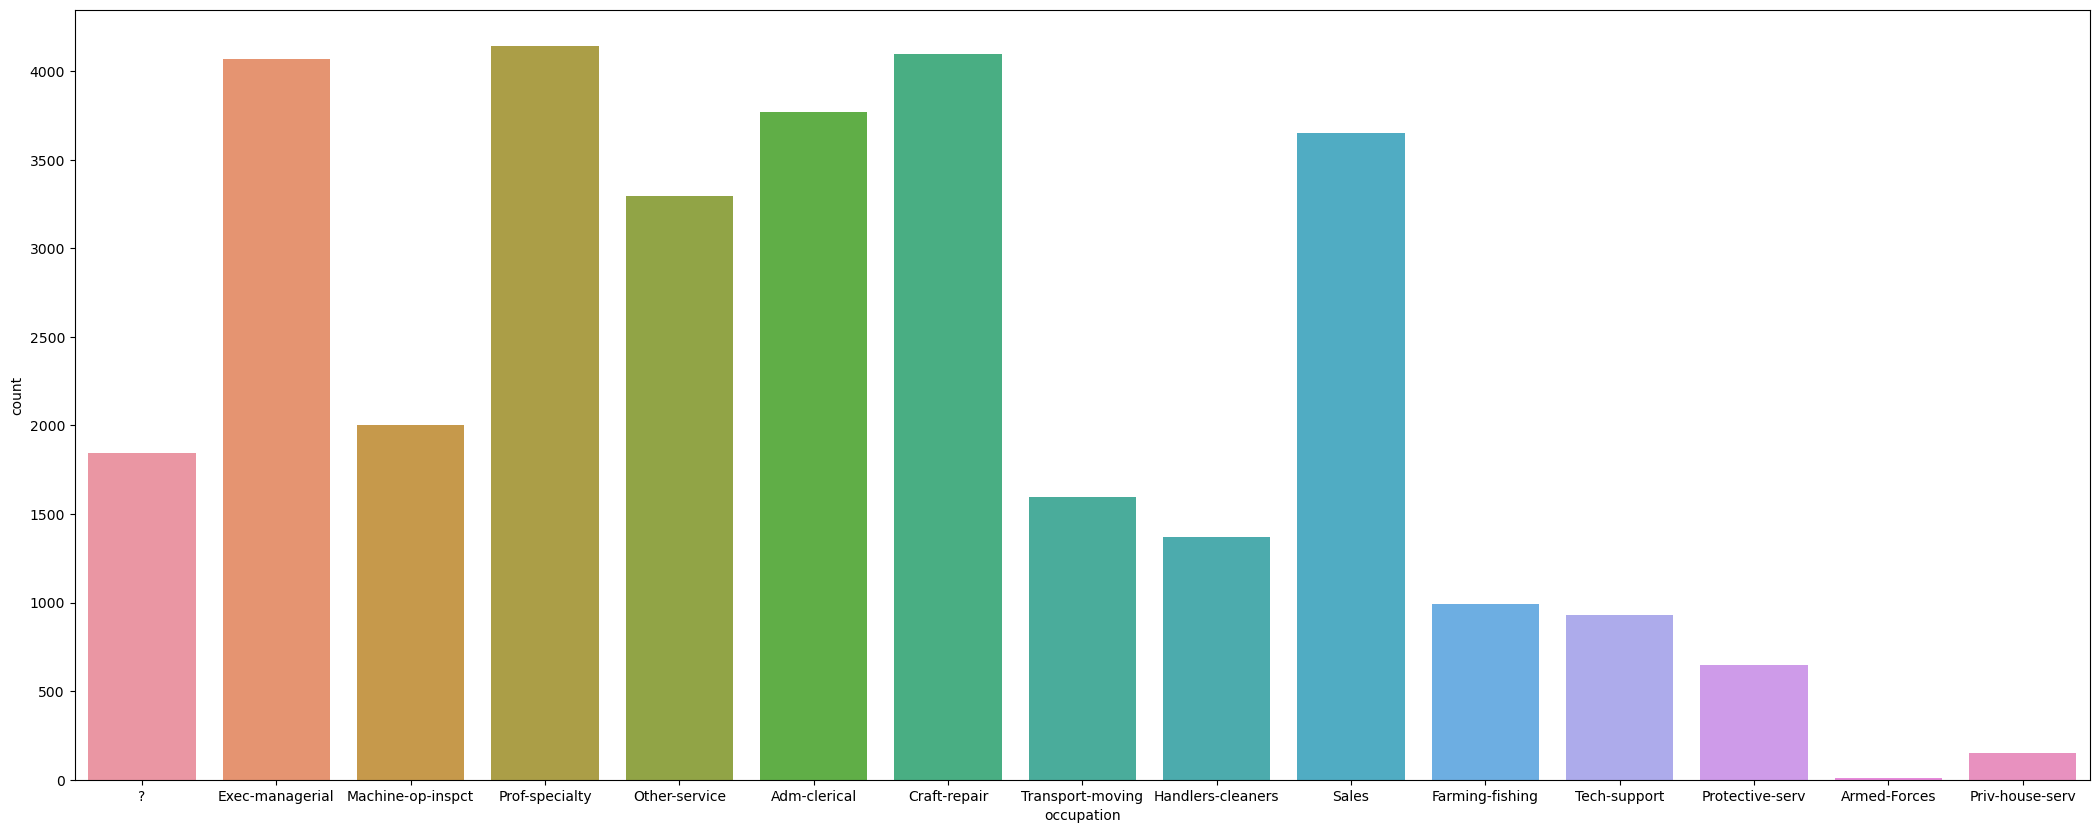

In [22]:
catg_freq(df,"occupation")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
list(df.select_dtypes(np.number).columns)

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

age


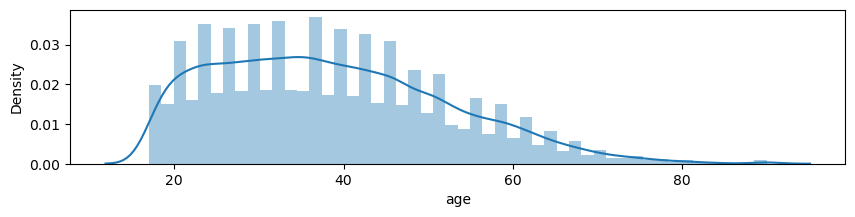

fnlwgt


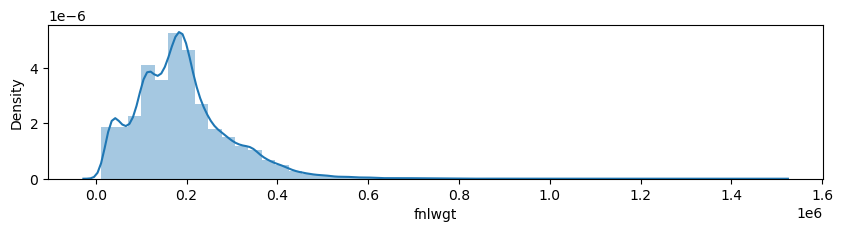

education.num


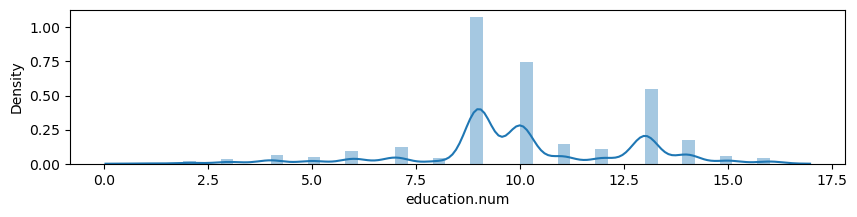

capital.gain


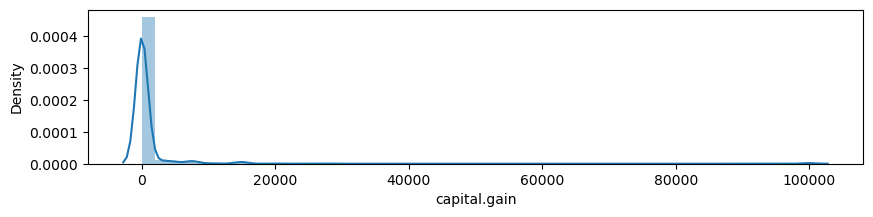

capital.loss


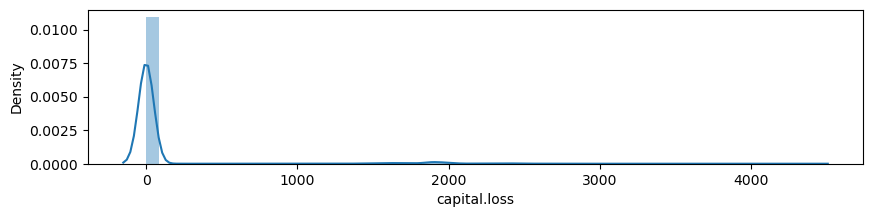

hours.per.week


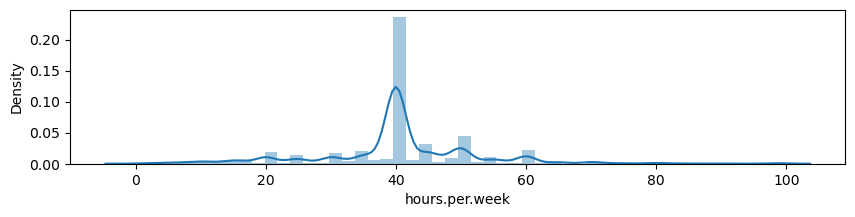

In [24]:
for i in list(df.select_dtypes(np.number).columns):
    print(i)
    fig = plt.figure(figsize=(10,2))
    sns.distplot(df[i],kde=True,)
    plt.show()

In [25]:
# From the above graphs we can view that hours.per.week is normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Working class with most population is Private    22696
Name: workclass, dtype: int64


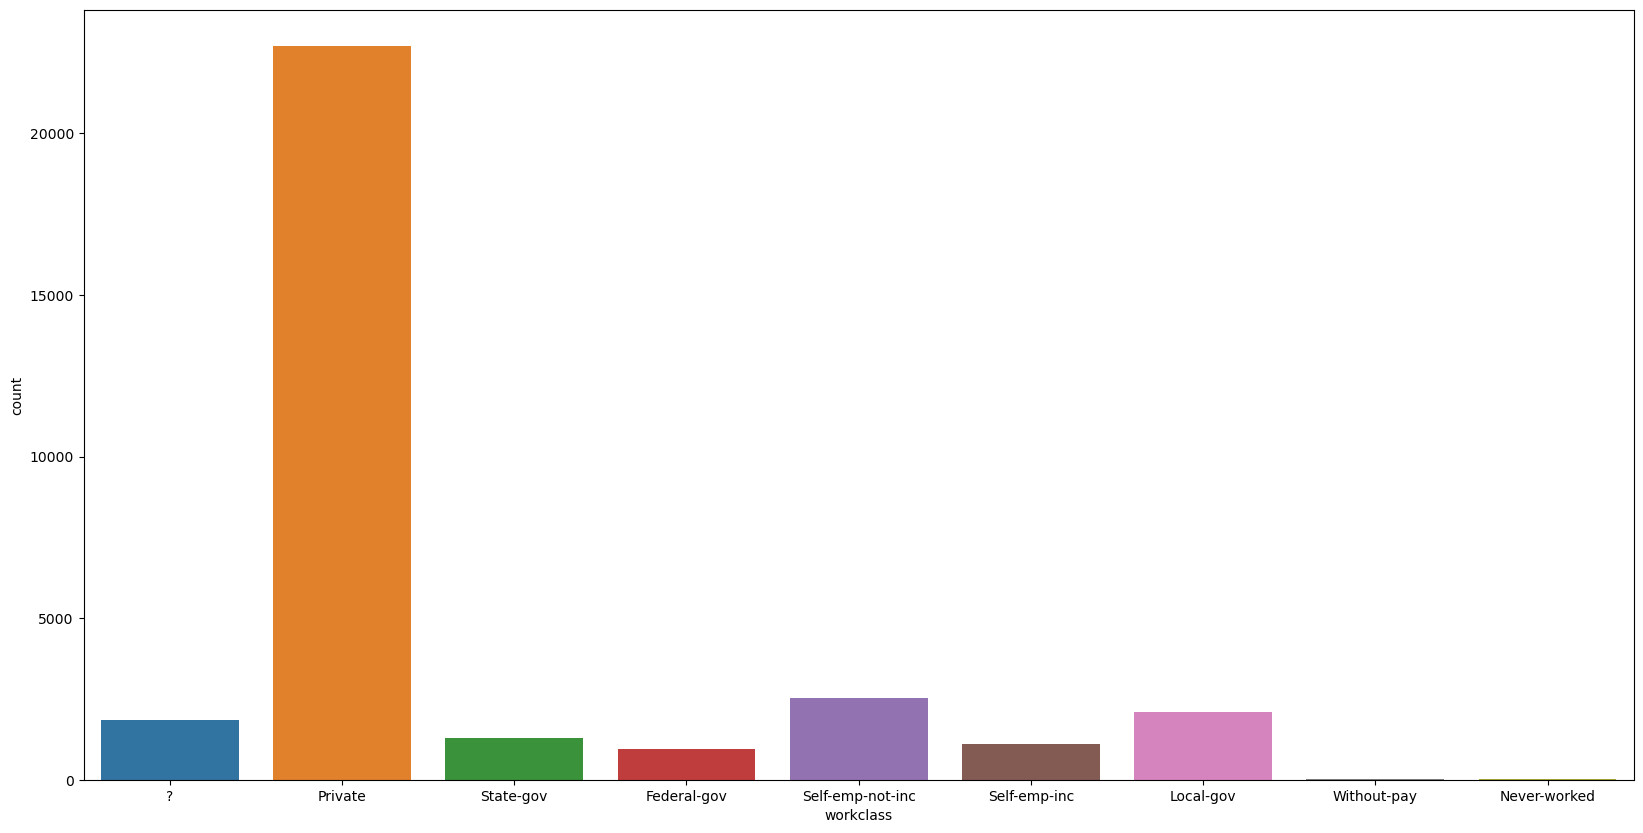

In [26]:
# df['workclass'].value_counts().nlargest(1)
print('Working class with most population is',df['workclass'].value_counts().nlargest(1))

plt.figure(figsize=(20,10))
sns.countplot(df,x='workclass')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# df['hours.per.week'].mode()
print('Most of the individuals are working',str(df['hours.per.week'].mode()[0]),'hours per week')

Most of the individuals are working 40 hours per week


<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df.skew(axis=0)

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

<Axes: xlabel='education.num', ylabel='Density'>

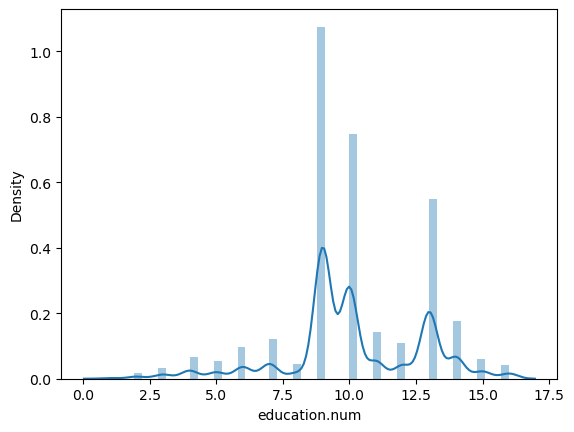

In [29]:
sns.distplot(df['education.num'],kde=True)

In [30]:
# education.num is negatively skewed(left skewed)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df.kurtosis(axis=0)

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64

In [32]:
# platykurtic: kurtosis < 0 (less number of outliers, lighter tails, values more dispersed away from the mean)
# Mesokurtic: kurtosis = 0 (Normal distribution)
# leptokurtic: kurtosis > 0 (more number of outliers, heavy tails, distribution concentrated towards mean)

In [33]:
# Age and education.num has kurtosis is less than 0 and the later is greater than 0 but CLOSE TO 0 so it can be considered as
# mesokrutic i.e. it has no or less number of outliers.

# education and other variables has kurtosis greater than 0 which is leptokrutic i.e. it has more number of outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

{'whiskers': [<matplotlib.lines.Line2D at 0x28d41d1f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x28d3e838b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d41d1ef90>],
 'medians': [<matplotlib.lines.Line2D at 0x28d41d29a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d41cba250>],
 'means': []}

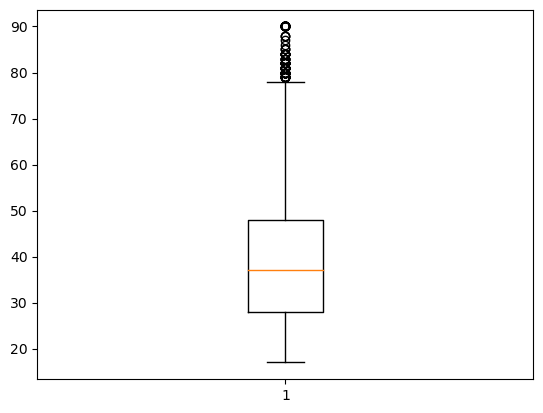

In [34]:
plt.boxplot(df['age'])

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df[['age','hours.per.week']].corr()

,age,hours.per.week
age,1.000000,0.069311
hours.per.week,0.069311,1.000000


In [36]:
# The correlation value is 0.07 which indicates it is close to 0. 
# Hence, there exists no correlation between age and hours.per.week

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# creating mask variable as matrix of 1s for the shape of df.corr() 
mask_var = np.ones_like(df.corr())
mask_var

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [38]:
# np.triu returns upper traingle of an array
# k=1 removes 1 diagonal starting from the middle
mask = np.triu(mask_var,k=1)
mask

array([[0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

<Axes: >

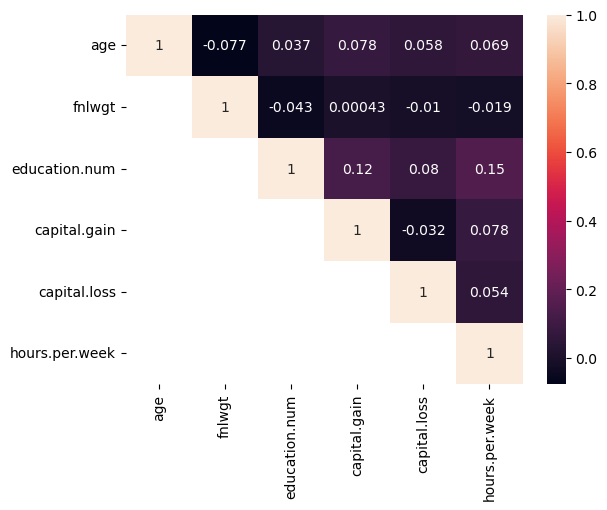

In [39]:
# Since we have 1s in the upper traingle in the matrix variable mask as seen above, that 1 equals True and it returns the lower
# traingle masking the upper portion. To get the upper traingle view, we take a transpose of matrix variable mask that returns
# upper traingle correlation matrix as expected

# mask: data will not be shown wherever mask is "True" a.k.a 1

sns.heatmap(df.corr(),annot=True,mask=mask.transpose()) # mask.transpose() for upper triangle